# Getting Data

In [20]:
#!kaggle competitions download -c store-sales-time-series-forecasting

In [40]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from learntools.core import binder
binder.bind(globals())
#from learntools.time_series.ex2 import *

# Setup notebook
from pathlib import Path
#from learntools.time_series.style import *  # plot style settings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [22]:
data=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv", 
                 parse_dates=['date'], 
                 infer_datetime_format=True,)
print(data.shape)
data.head()

(3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [23]:
data.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [24]:
submit=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv", parse_dates=['date'], index_col=['date'])
submit.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [25]:
submit_sample=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv")
submit_sample.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [26]:
stores=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
print(stores.shape)
stores.head()

(54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [27]:
oil=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv", parse_dates=['date'], index_col=['date'])
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [28]:
holidays_events=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv",parse_dates=['date'], index_col=['date'])
holidays_events.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [29]:
transactions=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv",parse_dates=['date'], index_col=['date'])
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


# Missing Values

In [30]:
data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [31]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [32]:
oil.isna().sum()

dcoilwtico    43
dtype: int64

In [33]:
oil[oil['dcoilwtico'].isna()]

,dcoilwtico
date,
2013-01-01,NaN
2013-01-21,NaN
2013-02-18,NaN
2013-03-29,NaN
2013-05-27,NaN
2013-07-04,NaN
2013-09-02,NaN
2013-11-28,NaN
2013-12-25,NaN


random values are missing. there are no values missing for a consecutive group of days. therefore, it is okay to replace each missing value with previous value. first value on index 0 can be filled by value at index 1

In [34]:
oil=oil.fillna(method="ffill")
oil=oil.fillna(method="bfill") #for 1st row

In [35]:
oil.isna().sum()

dcoilwtico    0
dtype: int64

In [36]:
holidays_events.isna().sum()

type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

# Trend

In [37]:
store_sales = data.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']
average_sales.head()

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
Freq: D, Name: sales, dtype: float64

<AxesSubplot:xlabel='date'>

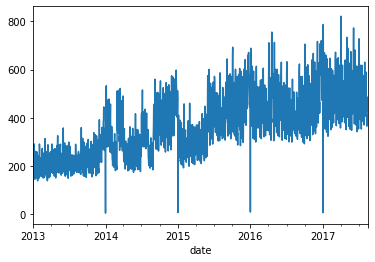

In [42]:
average_sales.plot()